# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Чтение файла

In [2]:
df = pd.read_csv('data.csv', delimiter=';')
df

,date,lvl_5,card_id,checks
0,2022-01-01,ВИНО АРОМАТИЗИРОВАННОЕ,3338,1
1,2022-01-01,ВИНО АРОМАТИЗИРОВАННОЕ,3988,1
2,2022-01-01,ВИНО АРОМАТИЗИРОВАННОЕ,12237,1
3,2022-01-01,ВИНО АРОМАТИЗИРОВАННОЕ,14576,1
4,2022-01-01,ВИНО АРОМАТИЗИРОВАННОЕ,18316,1
...,...,...,...,...
474163,2023-01-01,ШАМПАНСКИЕ И ИГРИСТЫЕ,982233653,1
474164,2023-01-01,ШАМПАНСКИЕ И ИГРИСТЫЕ,982296880,8
474165,2023-01-01,ШАМПАНСКИЕ И ИГРИСТЫЕ,992121889,6
474166,2023-01-01,ШАМПАНСКИЕ И ИГРИСТЫЕ,992211561,4


# Предпросмотр данных

Переименуем поле "номенклатуры" на более удобное

In [3]:
df.rename(columns={'lvl_5': 'name'}, inplace=True)

Смотрим количество пропущенных значений

In [4]:
df.isna().sum()

date       0
name       0
card_id    0
checks     0
dtype: int64

Убедимся, что в данных действительно есть клиенты, которые совершают разные покупки

In [5]:
df[df.duplicated('card_id')].head(5)

,date,name,card_id,checks
302,2022-01-01,ВИНО БЕЛОЕ,12237,4
343,2022-01-01,ВИНО БЕЛОЕ,42781,1
357,2022-01-01,ВИНО БЕЛОЕ,58235,4
381,2022-01-01,ВИНО БЕЛОЕ,87546,2
441,2022-01-01,ВИНО БЕЛОЕ,164286,1


Посмотрим данные одного из таких клиентов

In [6]:
df[df['card_id'] == 12237].head(5)

,date,name,card_id,checks
2,2022-01-01,ВИНО АРОМАТИЗИРОВАННОЕ,12237,1
302,2022-01-01,ВИНО БЕЛОЕ,12237,4
11679,2022-01-01,"КОНЬЯК, БРЕНДИ РОССИЯ",12237,1
12307,2022-01-01,НАПИТКИ Б/А 1Л И БОЛЕЕ,12237,1
15368,2022-01-01,НАПИТКИ Б/А МЕНЕЕ 1 Л,12237,1


Посмотрим на все имеющиеся даты

In [7]:
df['date'].unique()

array(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
       '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
       '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
       '2023-01-01'], dtype=object)

Данные предоставлены за период "2022-01-01" - "2023-01-01", каждая дата представляет из себя 01 число каждого из месяцев

Посмотрим уникальные значения номенклатуры

In [8]:
print('Количество уникальных значений: ' + str(df['name'].nunique()))
df['name'].unique()

Количество уникальных значений: 31


array(['ВИНО АРОМАТИЗИРОВАННОЕ', 'ВИНО БЕЛОЕ', 'ВИНО БЭГ-ИН-БОКС/ТЕТРАП.',
       'ВИНО КРАСНОЕ', 'ВИНО КРЕПЛЕНОЕ, КАГОР', 'ВИНО ПЛОДОВЫЕ',
       'ВИНО РОЗОВЫЕ', 'ВИСКИ', 'ВОДА 1Л И БОЛЕЕ', 'ВОДА МЕНЕЕ 1 ЛИТРА',
       'ВОДКА ОБЫКНОВЕННАЯ', 'ВОДКА ОСОБАЯ',
       'ГАЗИРОВАННЫЙ ВИННЫЙ НАПИТОК', 'ДИСТИЛЛЯТЫ ПРОЧИЕ',
       'ИМП. КОНЬЯК, БРЕНДИ, АРМАНЬЯК', 'КОНЬЯК, БРЕНДИ РОССИЯ',
       'ЛИКЕРЫ, БАЛЬЗАМЫ', 'НАПИТКИ Б/А 1Л И БОЛЕЕ',
       'НАПИТКИ Б/А МЕНЕЕ 1 Л', 'НАСТОЙКИ', 'ПИВО БОЛЕЕ 1 ЛИТРА',
       'ПИВО ДО 1 ЛИТРА', 'ПРЕДМЕТЫ ДЛЯ КУРЕНИЯ', 'РАЗЛИВНЫЕ НАПИТКИ',
       'СИГАРЕТЫ', 'СИРОПЫ И ФРУКТ. НАПИТКИ', 'СЛАБЫЙ АЛКОГОЛЬ',
       'СОКИ И НЕКТАРЫ 1 Л И МЕНЕЕ', 'СОКИ И НЕКТАРЫ В ИНД УПАКОВКЕ',
       'СОКИ И НЕКТАРЫ СВЫШЕ 1 Л.', 'ШАМПАНСКИЕ И ИГРИСТЫЕ'], dtype=object)

Сохраним уникальные значения для будущего анализа

In [9]:
name_list = list(df['name'].unique())

# Предобработка данных

Для анализа возьмем позицию номенклатуры с самым большим количеством чеков

In [10]:
name_with_max_checks = df.groupby('name')['checks'].sum().idxmax()
name_with_max_checks

'ШАМПАНСКИЕ И ИГРИСТЫЕ'

Создадим отдельный датасет для анализа этой позиции

In [11]:
# преобразуем поле date в формат даты
df['date'] = pd.to_datetime(df['date'])

# переименуем старый датасет, а у нового оставим название покороче
df_original = df

# создадим новый датасет
df = df[df['name'] == name_with_max_checks]

# удалим столбец с названием чтобы не мешал
df = df.drop('name', axis=1)

df.head(5)

,date,card_id,checks
32153,2022-01-01,497,1
32154,2022-01-01,849,1
32155,2022-01-01,947,1
32156,2022-01-01,1196,9
32157,2022-01-01,1327,1


Найдем для каждой группы первый месяц покупки товара

In [12]:
# сгруппируем данные
df['first_month'] = df.groupby('card_id')['date'].transform('min')

# проверим
df.loc[df['date'] != df['first_month']].head(1)

,date,card_id,checks,first_month
63249,2022-02-01,1327,1,2022-01-01


Вычислим разницу между месяцем текущей покупки и месяцем первой покупки для каждой строки

In [13]:
# функция вычисления разницы месяцев
def diff_month(x):
    d1 = x['date']
    d2 = x['first_month']
    return ((d1.year - d2.year) * 12 + d1.month - d2.month)

In [14]:
# расчитаем разницу
df['diff_month'] = df.apply(lambda x: diff_month(x), axis=1)

# проверим
df.head(1)

,date,card_id,checks,first_month,diff_month
32153,2022-01-01,497,1,2022-01-01,0


Расчитаем сколько уникальных клиентов было привлечено в месяц для каждой когорты

In [15]:
# функция для расчета
def get_cohort_matrix(data, var='card_id', func=pd.Series.nunique):
    # сгруппируем данные
    grouped_data = data.groupby(['first_month', 'diff_month'])[var].apply(func).reset_index()
    # абсолютное значение для каждой когорты
    abs = grouped_data.pivot_table(index = 'first_month', columns = 'diff_month', values = var)
    # процентное значение для каждой когорты
    perc = abs.divide(abs.iloc[:,0], axis = 0).round(3) * 100
    return abs, perc

In [16]:
# сохраним абсолютные и процентные значения
absolute, percentage = get_cohort_matrix(df)

# Результат

Выведем абсолютные значения новых клиентов для каждой когорты

In [17]:
absolute

diff_month,0,1,2,3,4,5,6,7,8,9,10,11,12
first_month,,,,,,,,,,,,,
2022-01-01,1792.0,275.0,308.0,181.0,219.0,212.0,193.0,173.0,170.0,218.0,222.0,433.0,266.0
2022-02-01,688.0,110.0,51.0,68.0,69.0,64.0,56.0,46.0,83.0,65.0,151.0,75.0,NaN
2022-03-01,917.0,72.0,84.0,69.0,62.0,55.0,58.0,89.0,81.0,174.0,95.0,NaN,NaN
2022-04-01,343.0,42.0,30.0,19.0,21.0,15.0,27.0,31.0,58.0,26.0,NaN,NaN,NaN
2022-05-01,466.0,42.0,37.0,32.0,35.0,49.0,39.0,98.0,42.0,NaN,NaN,NaN,NaN
2022-06-01,589.0,56.0,39.0,27.0,43.0,47.0,101.0,55.0,NaN,NaN,NaN,NaN,NaN
2022-07-01,501.0,34.0,18.0,32.0,39.0,86.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,424.0,27.0,32.0,31.0,80.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,393.0,35.0,33.0,66.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выведем процентные значения новых клиентов для каждой когорты

In [18]:
percentage

diff_month,0,1,2,3,4,5,6,7,8,9,10,11,12
first_month,,,,,,,,,,,,,
2022-01-01,100.0,15.3,17.2,10.1,12.2,11.8,10.8,9.7,9.5,12.2,12.4,24.2,14.8
2022-02-01,100.0,16.0,7.4,9.9,10.0,9.3,8.1,6.7,12.1,9.4,21.9,10.9,NaN
2022-03-01,100.0,7.9,9.2,7.5,6.8,6.0,6.3,9.7,8.8,19.0,10.4,NaN,NaN
2022-04-01,100.0,12.2,8.7,5.5,6.1,4.4,7.9,9.0,16.9,7.6,NaN,NaN,NaN
2022-05-01,100.0,9.0,7.9,6.9,7.5,10.5,8.4,21.0,9.0,NaN,NaN,NaN,NaN
2022-06-01,100.0,9.5,6.6,4.6,7.3,8.0,17.1,9.3,NaN,NaN,NaN,NaN,NaN
2022-07-01,100.0,6.8,3.6,6.4,7.8,17.2,7.8,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,100.0,6.4,7.5,7.3,18.9,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,100.0,8.9,8.4,16.8,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Визуализация

In [19]:
# функция для построения графика
def showplot(name, percentage):
    dates = df['date'].dt.to_period('M').unique()

    fig, ax = plt.subplots(figsize=(10, 8))
    fig.suptitle(f'Когортный анализ товара "{name}" (% от первого месяца по строке)', fontsize=12, y=0.97, x=0.45)
    heatmap = ax.imshow(percentage, cmap='Blues')

    for i in range(percentage.shape[0]):
        for j in range(percentage.shape[1]):
            ax.text(j, i, '-' if np.isnan(percentage.iloc[i, j]) else round(percentage.iloc[i, j], 1), ha='center', va='center', color='black')

    ax.xaxis.tick_top()
    ax.xaxis.set_label_coords(0.5, 1.07)
    ax.xaxis.set_label_text('Количество месяцев от первой покупки')
    ax.yaxis.set_label_text('Месячные календарные когорты покупателей')
    plt.xticks(range(percentage.shape[1]))
    plt.yticks(range(len(dates)), dates)
    plt.colorbar(heatmap)
    plt.show()

Построим график

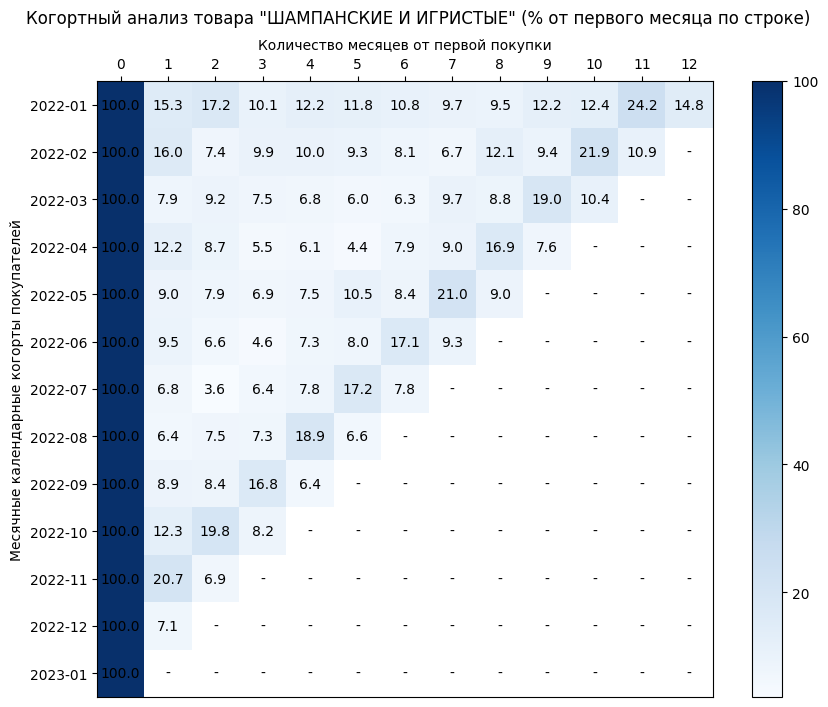

In [20]:
showplot(name_with_max_checks, percentage)

# Итоговый расчет для всех позиций номенклатуры

Расчитаем показатели для каждого из товаров номенклатуры и выведем на графике

In [21]:
# функция для вывода графика когортного анализа для любой из позиций номенклатуры
def get_analysis(name):
    # вернем датасет в исходное состояние
    df = df_original

    # создадим новый датасет только с нужной позицией
    df = df[df['name'] == name]

    # удалим столбец с названием чтобы не мешал
    df = df.drop('name', axis=1)

    # сгруппируем данные
    df['first_month'] = df.groupby('card_id')['date'].transform('min')

    # расчитаем разницу
    df['diff_month'] = df.apply(lambda x: diff_month(x), axis=1)

    # расчитаем абсолютные и уникальные значения новых клиентов для каждой когорты
    absolute, percentage = get_cohort_matrix(df)

    # построим график
    showplot(name, percentage)

### WARNING: ниже представлен 31 график

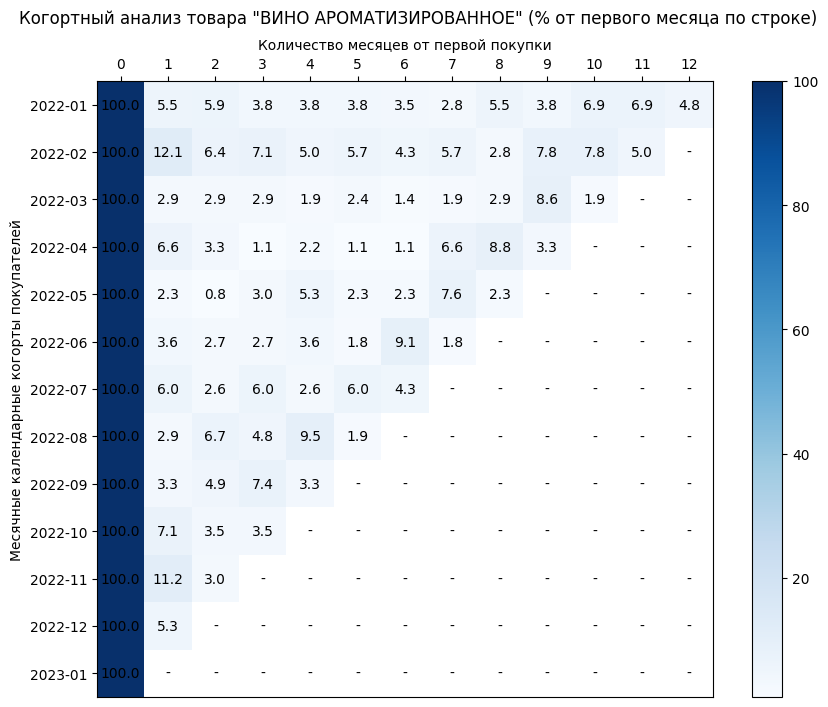

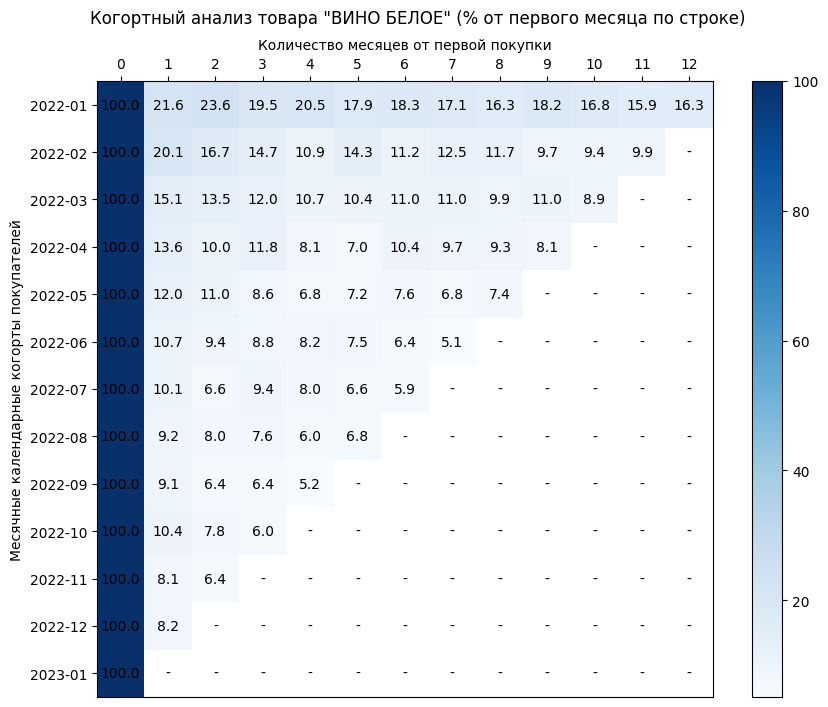

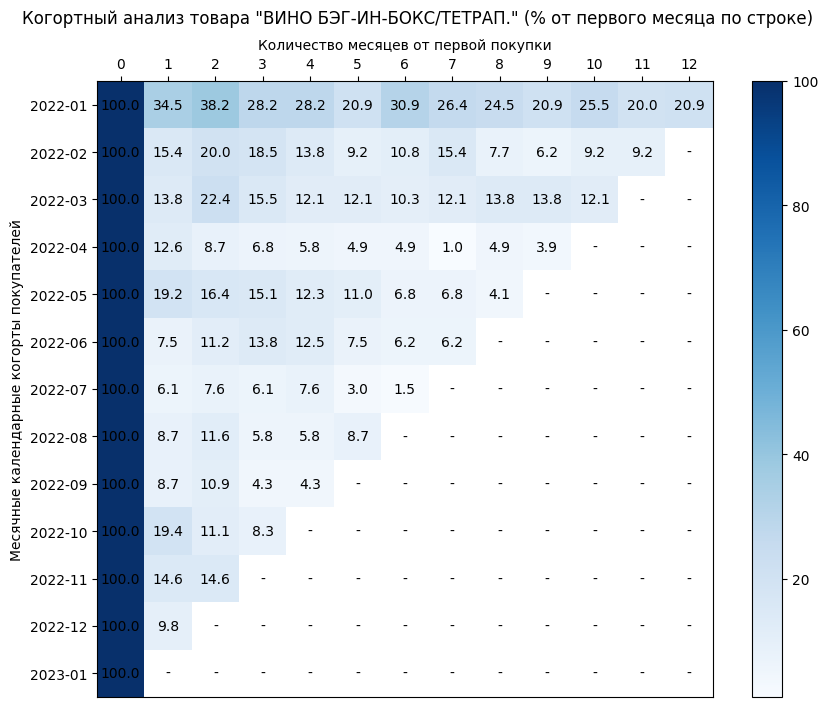

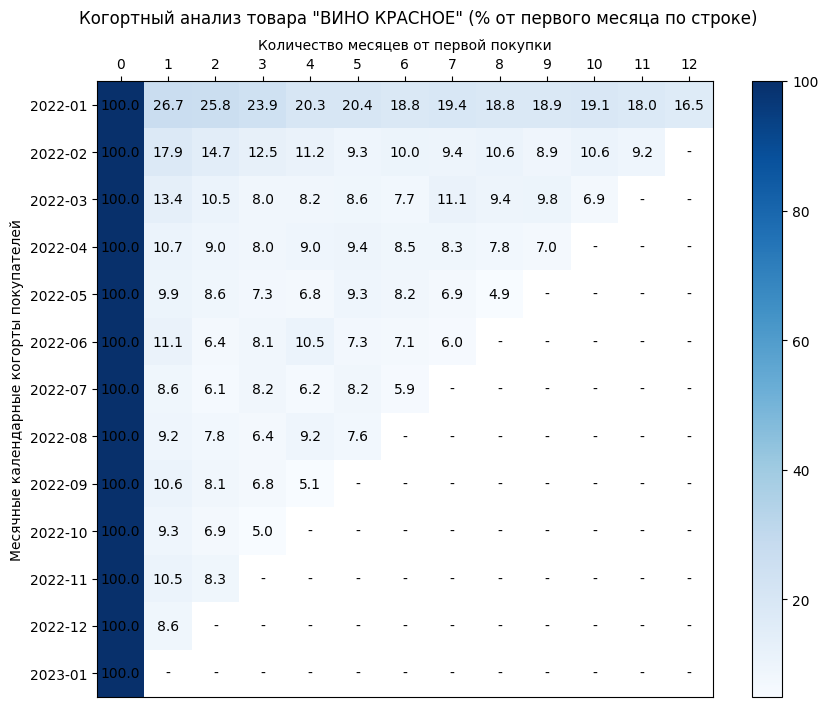

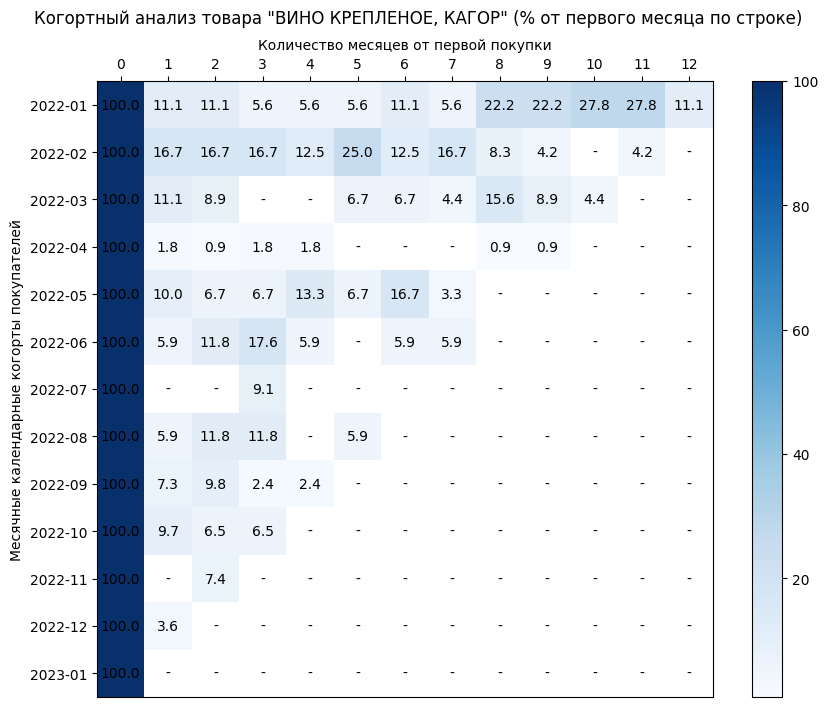

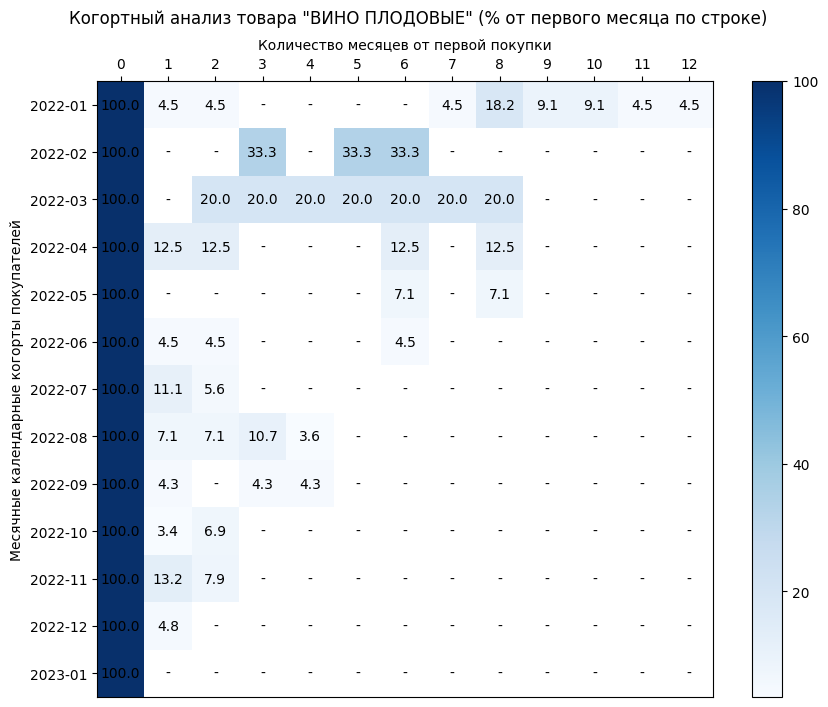

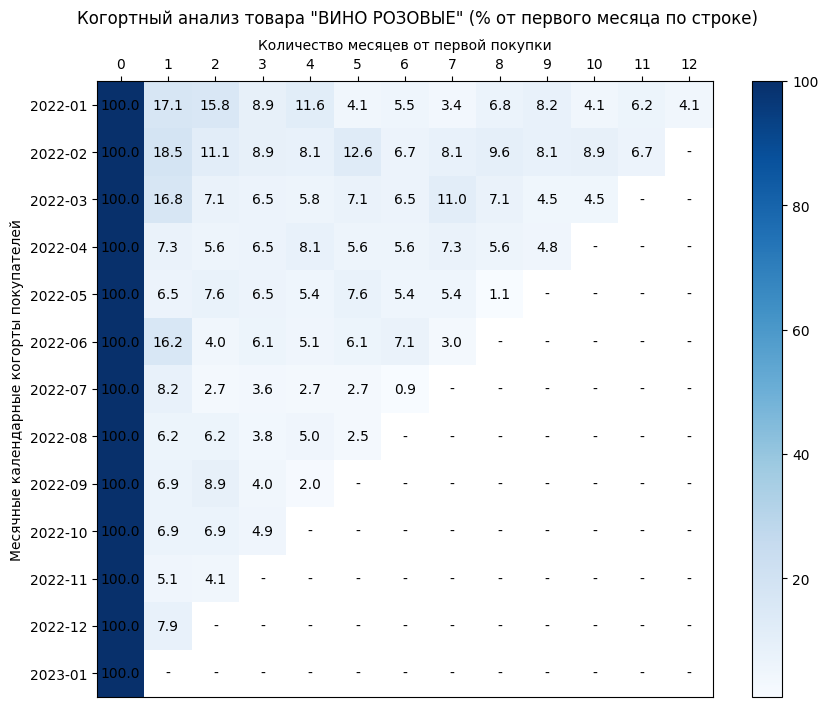

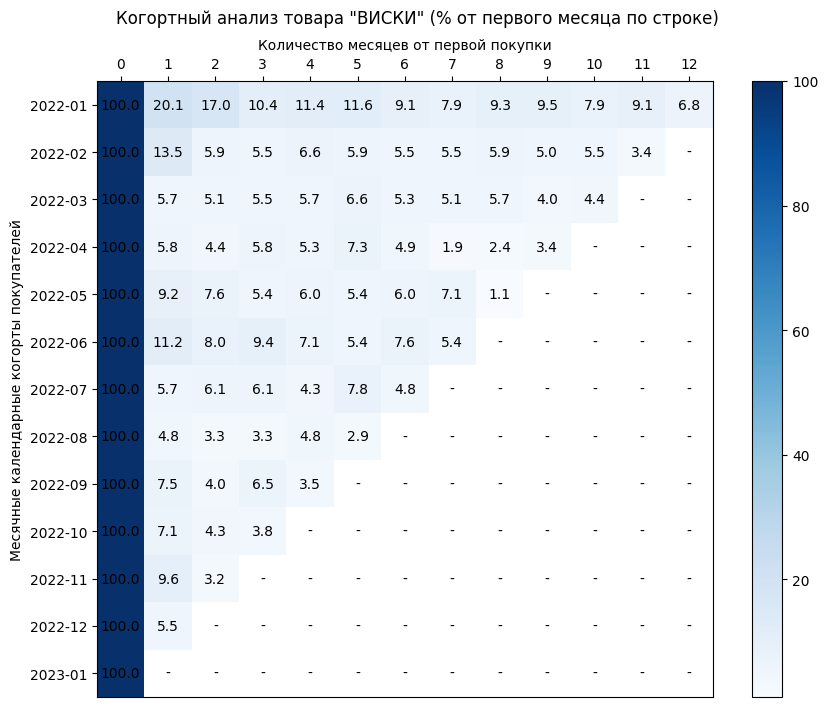

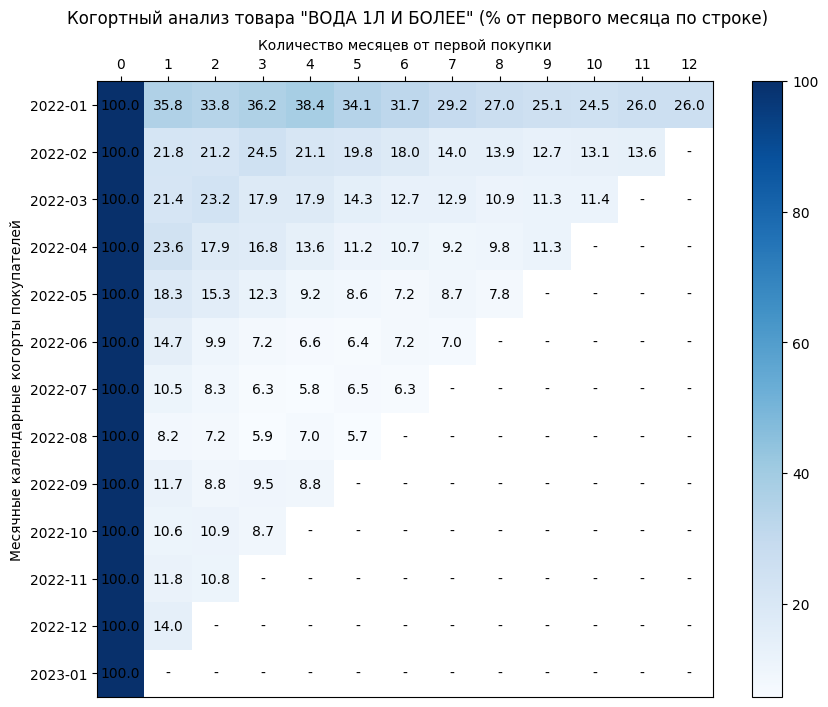

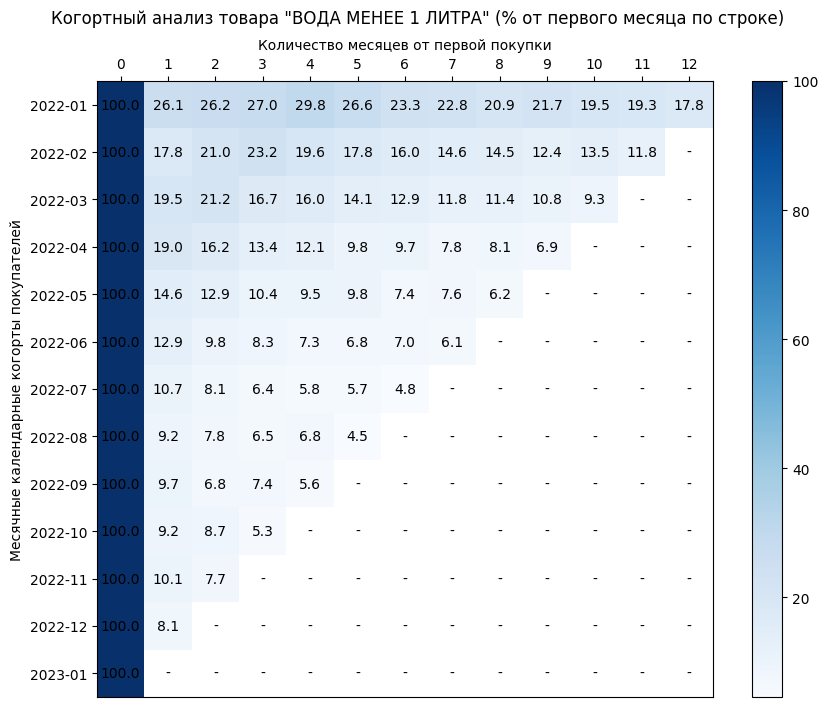

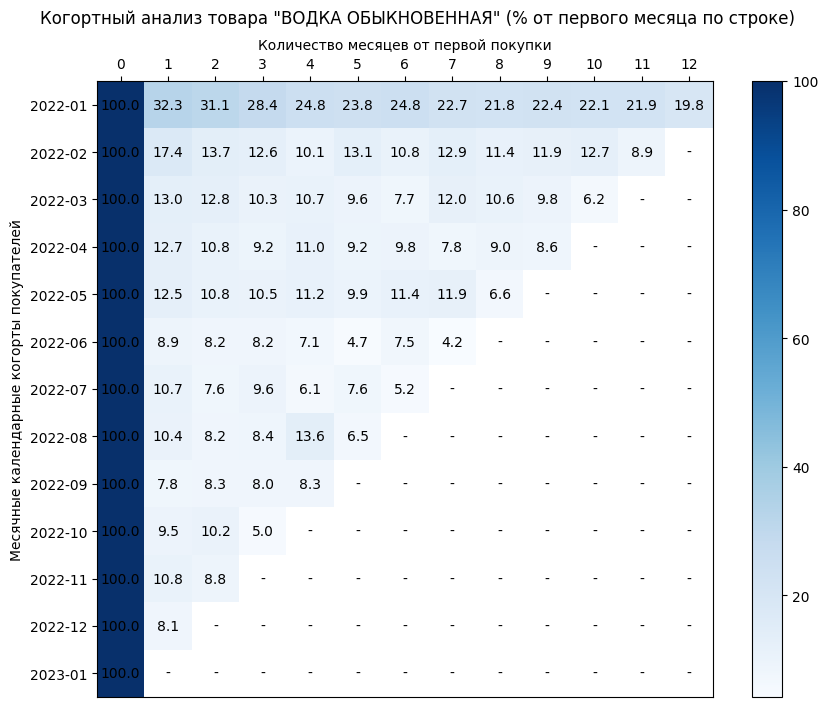

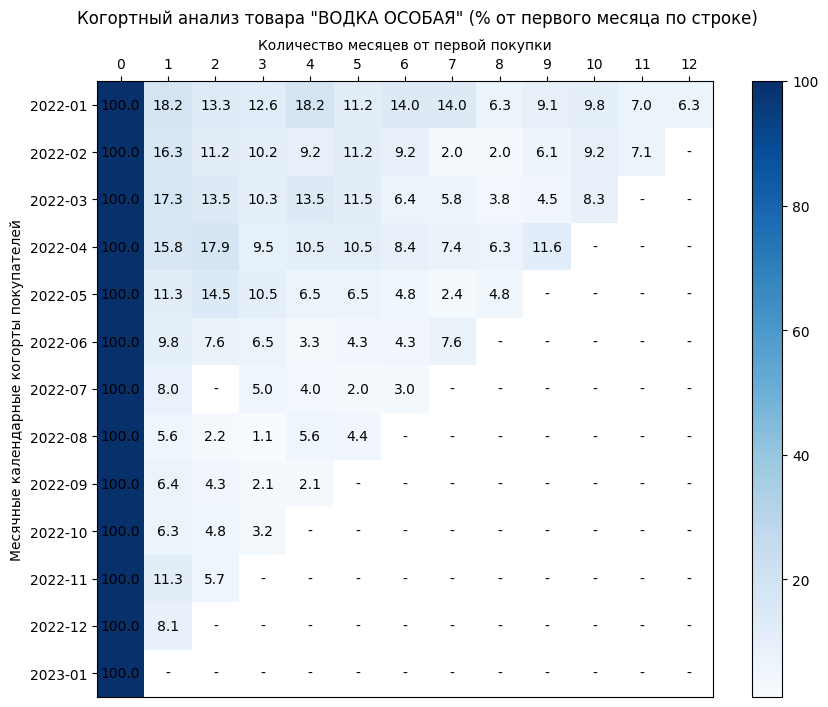

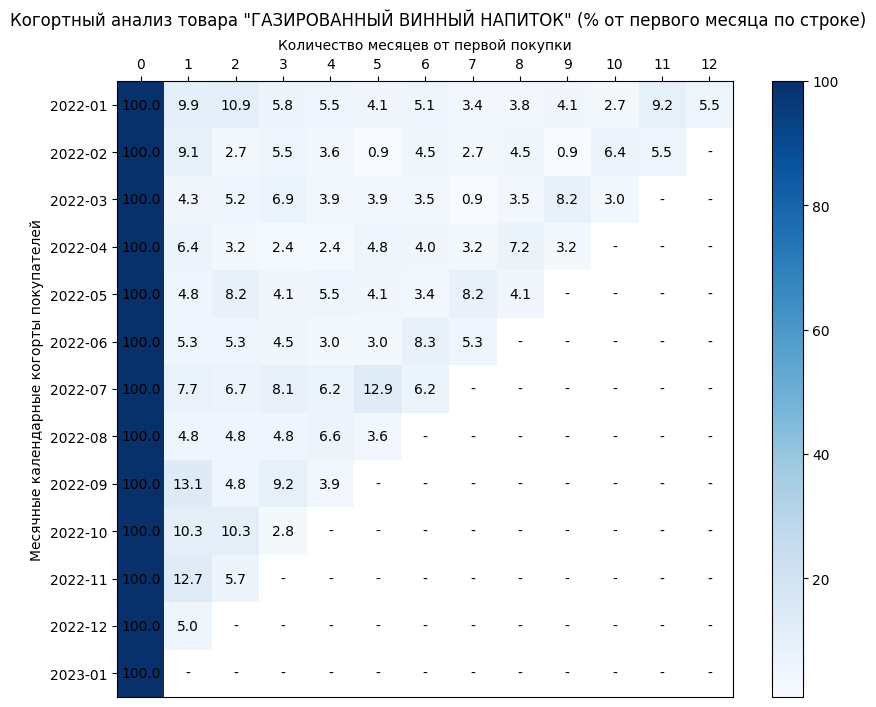

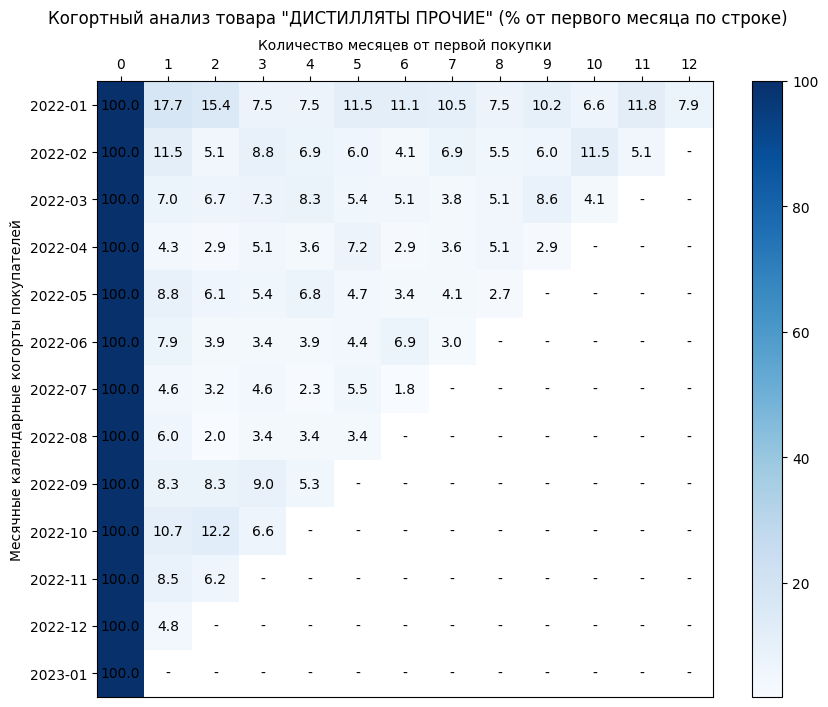

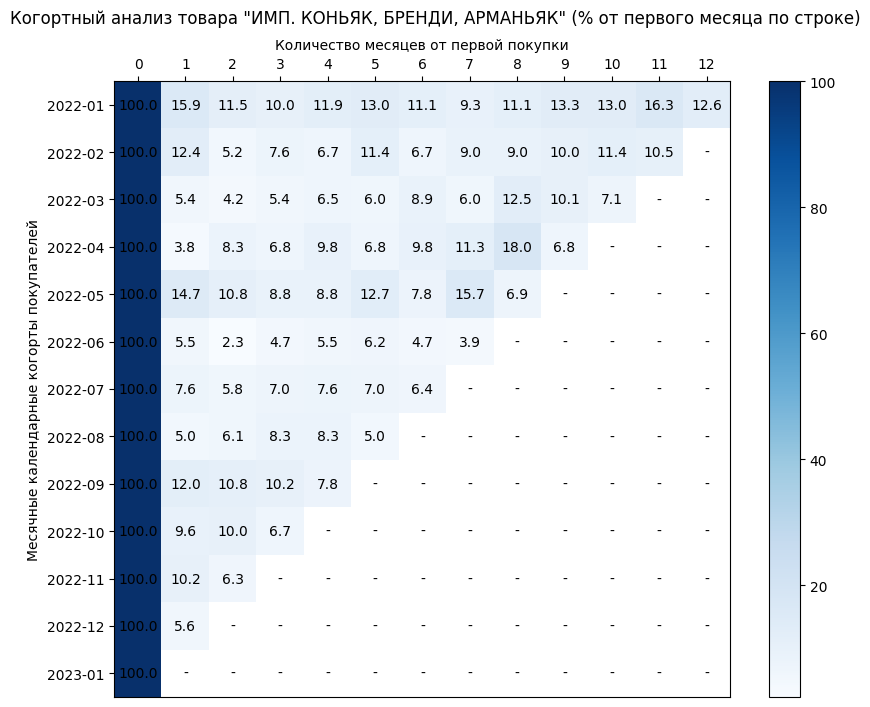

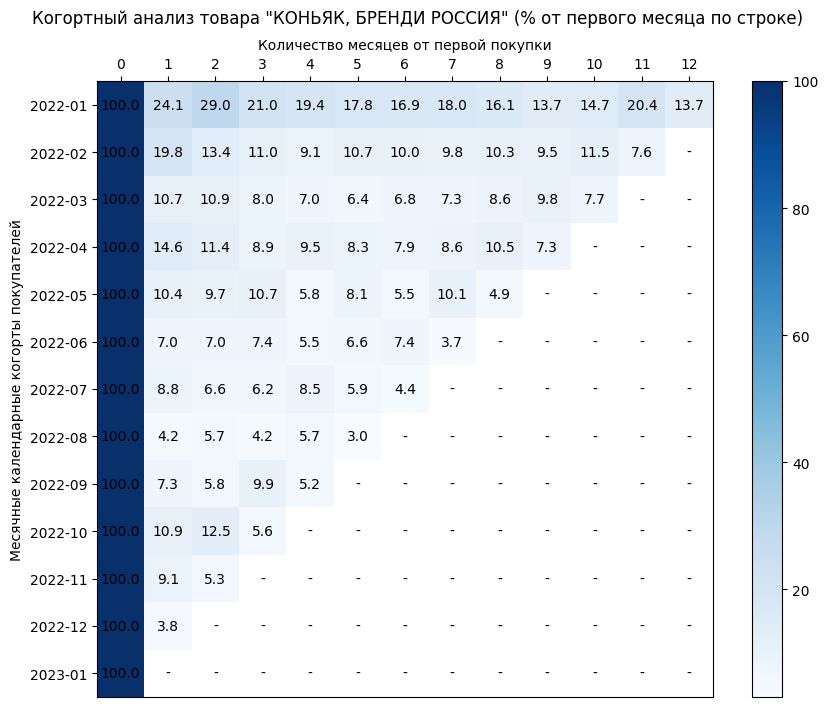

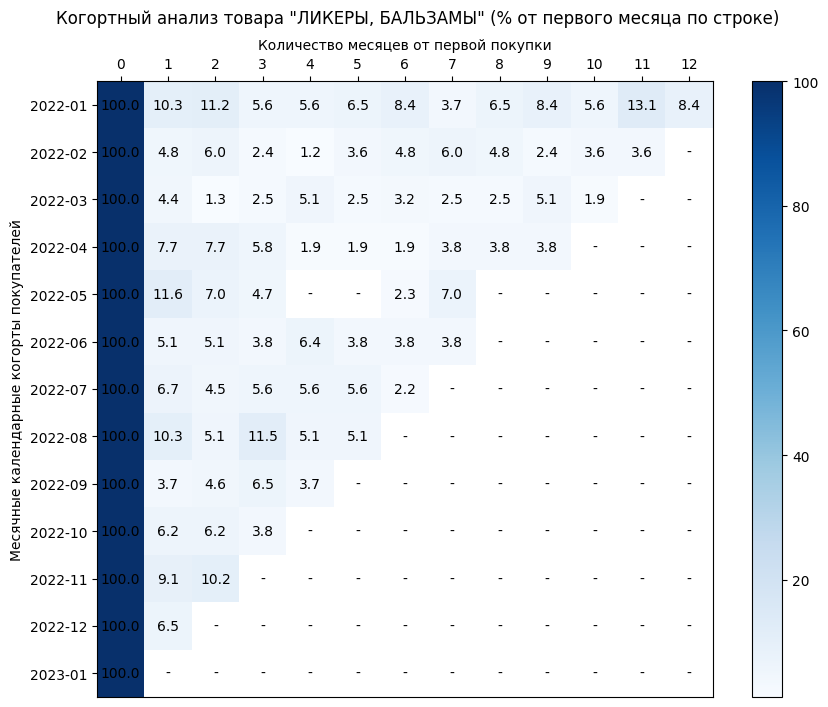

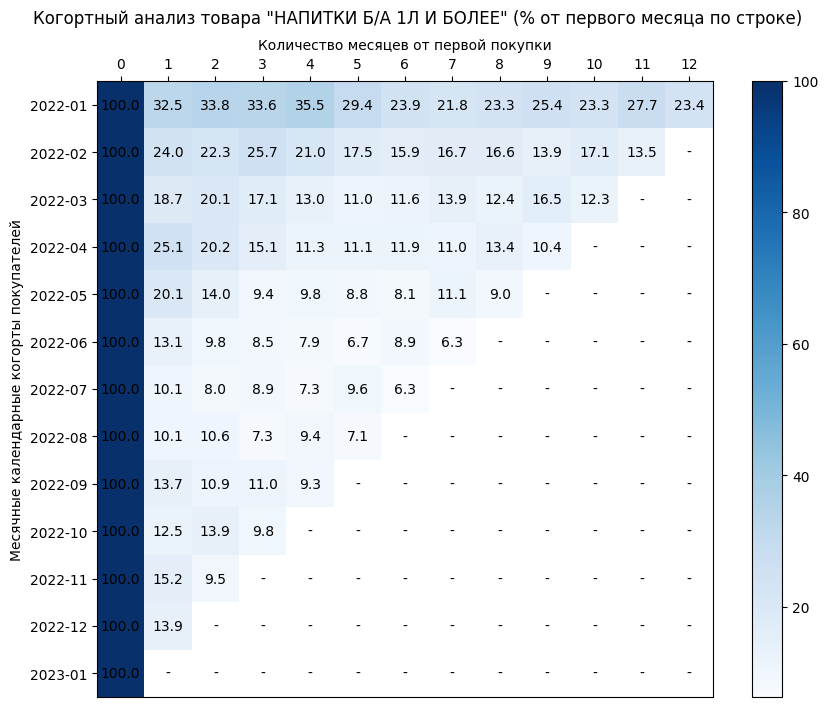

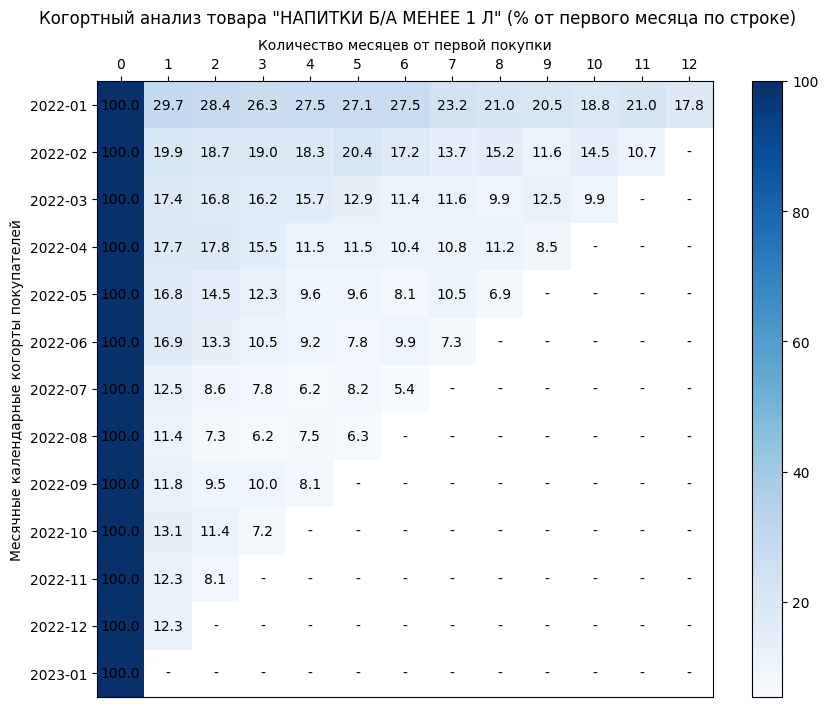

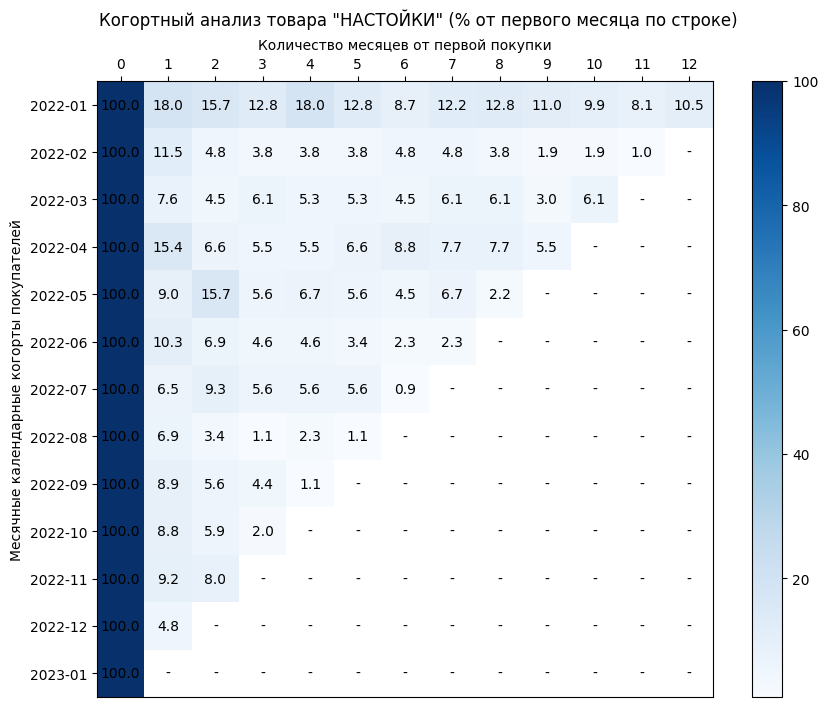

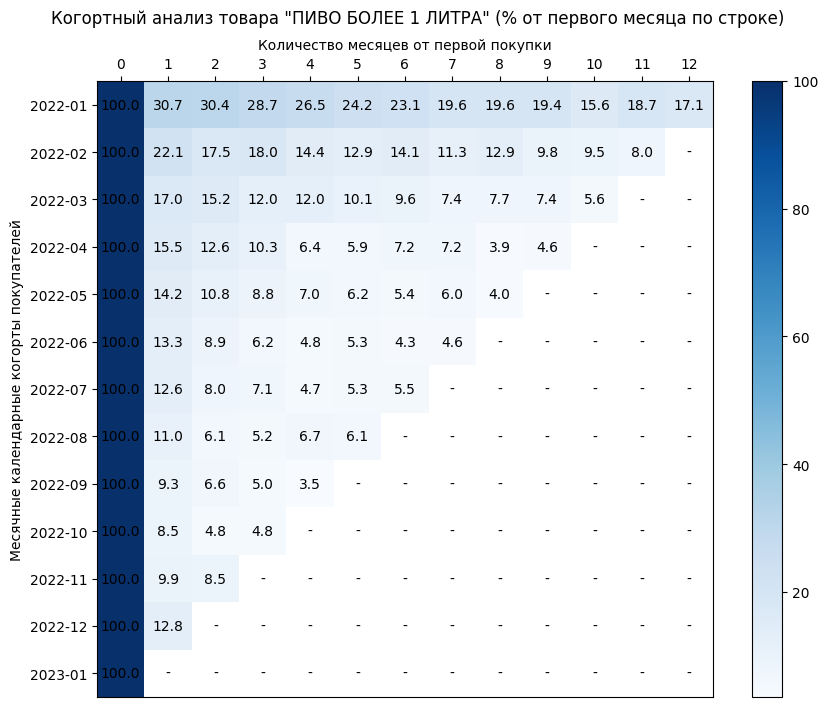

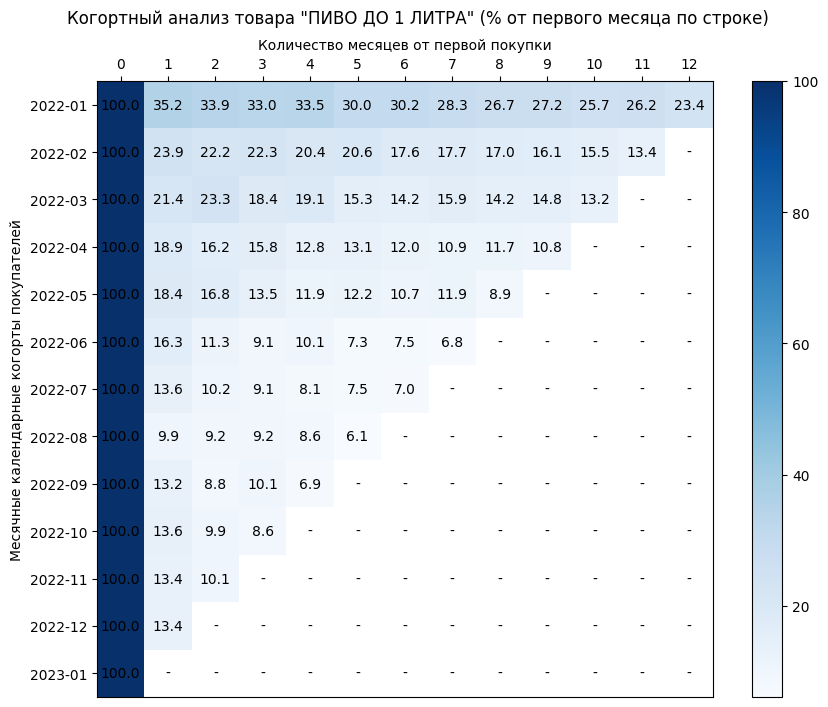

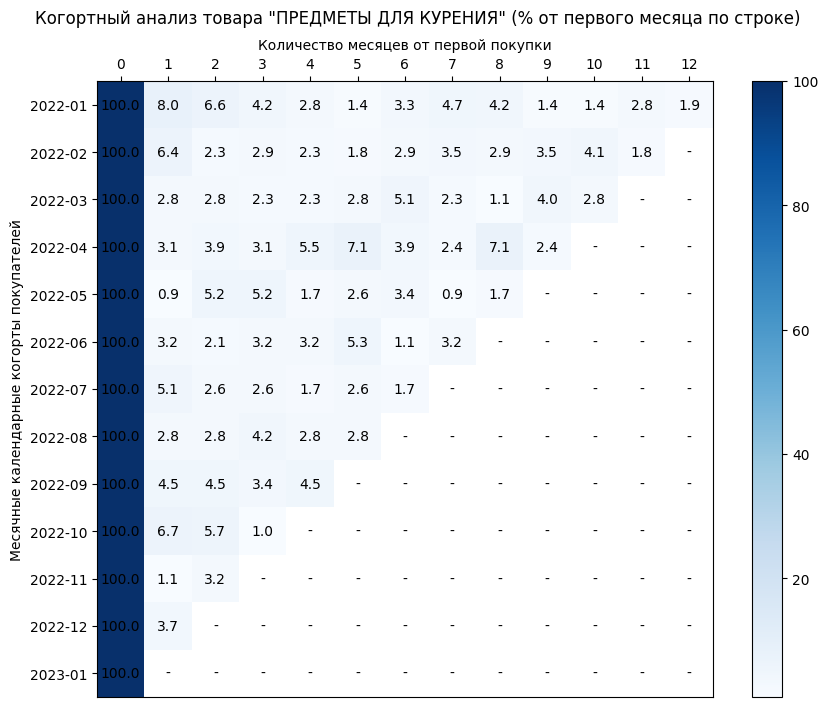

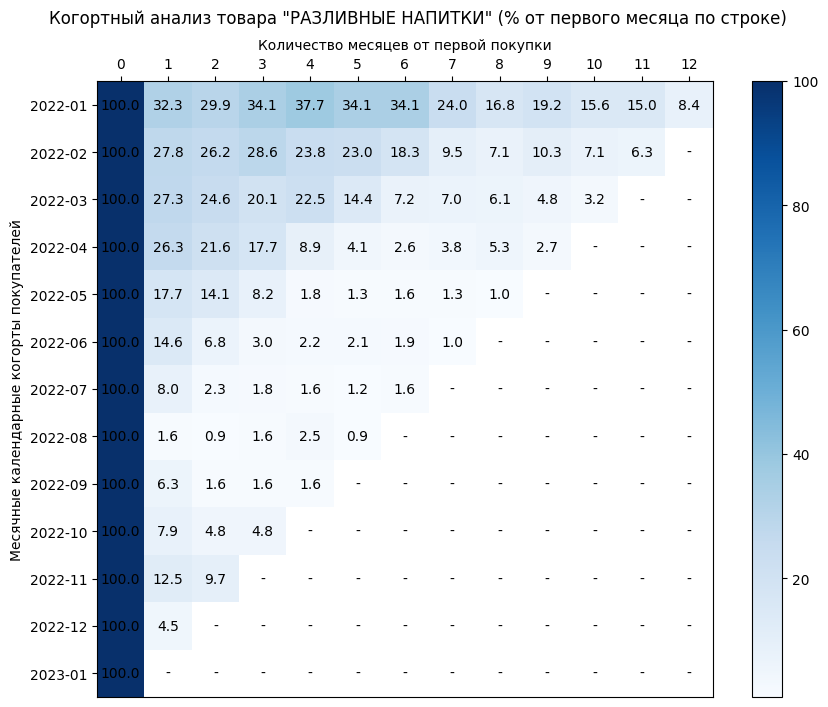

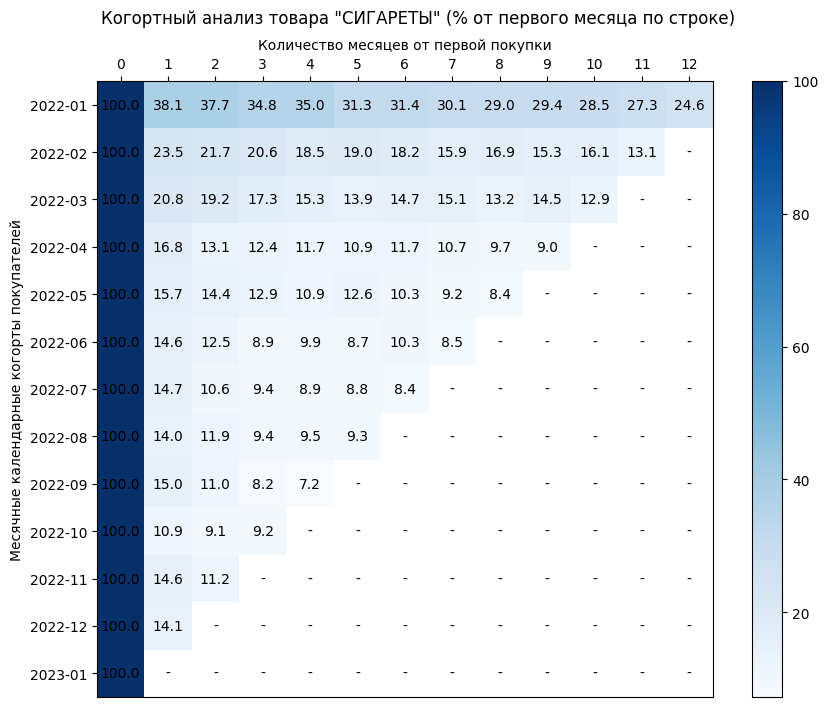

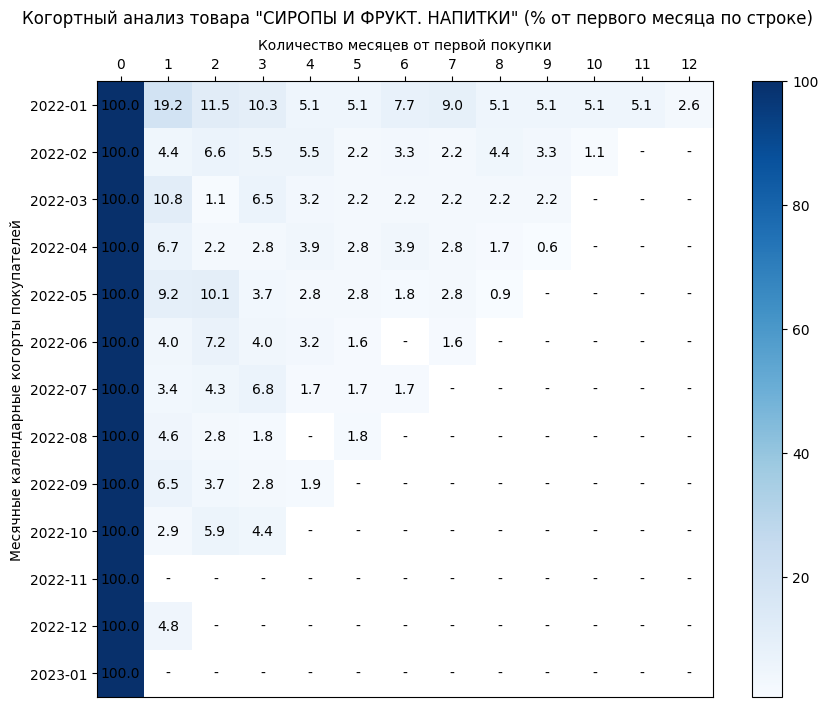

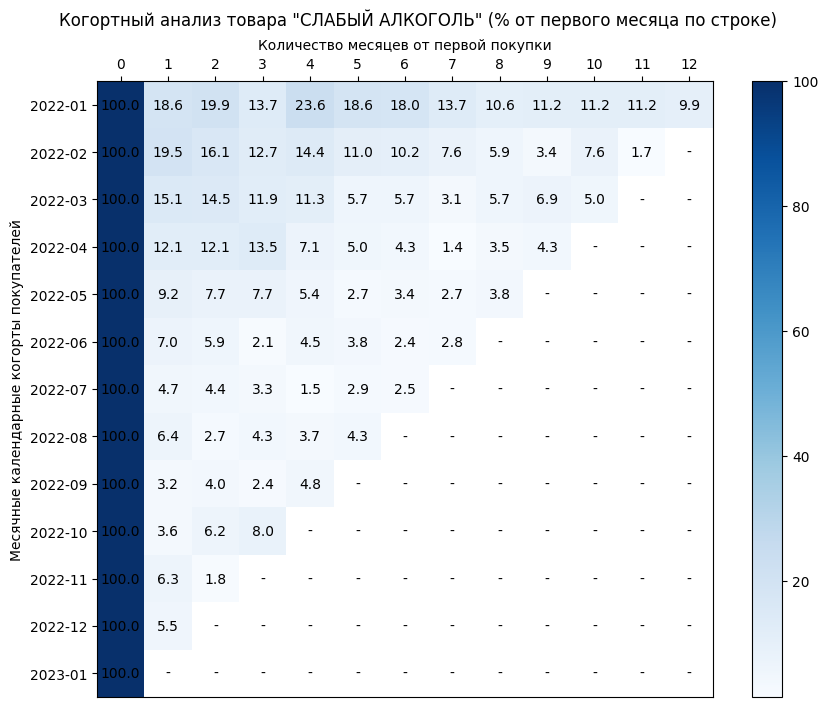

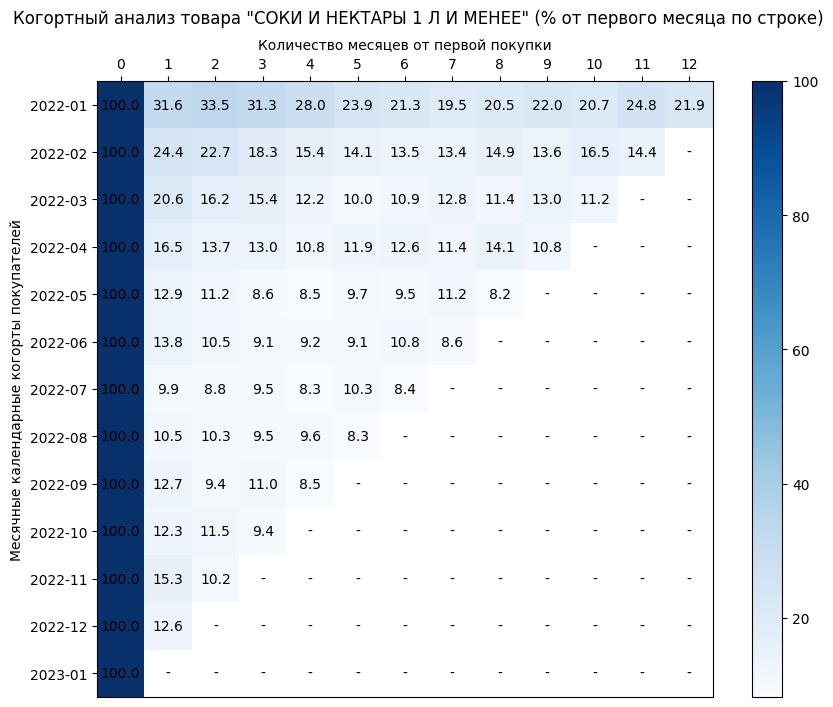

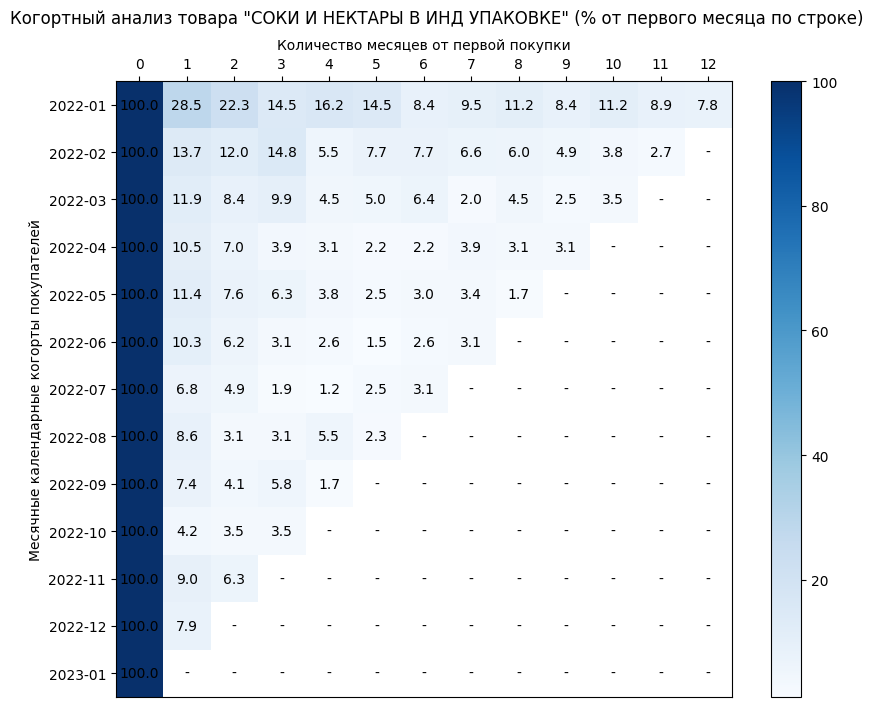

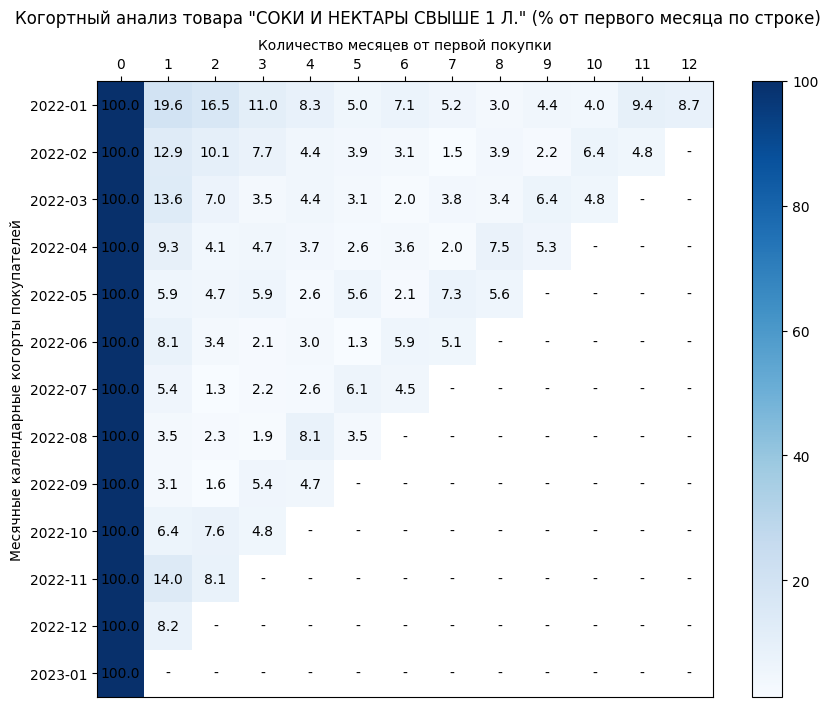

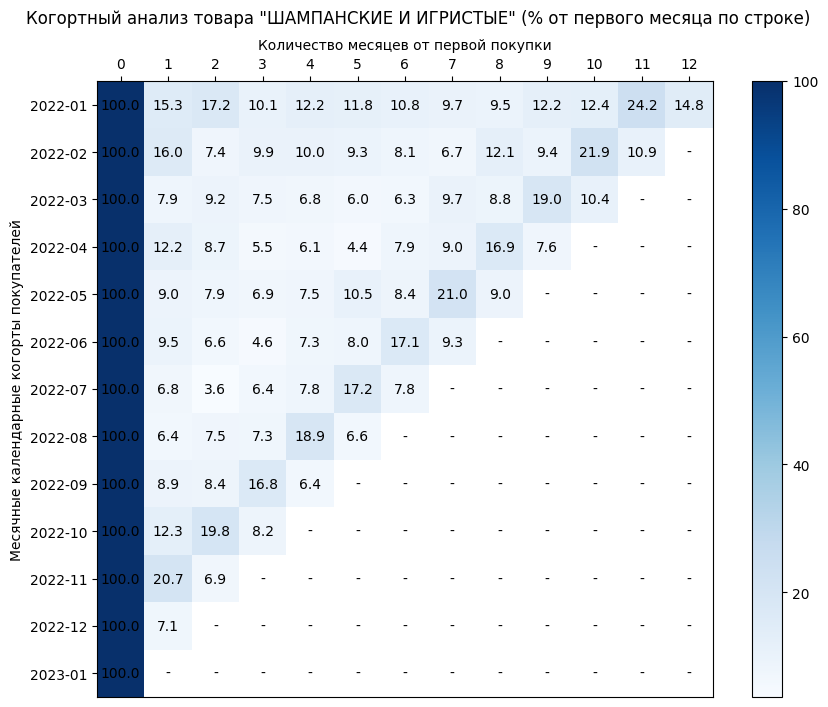

In [22]:
for _ in name_list:
    get_analysis(_)